In [1]:
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Uploading kaggle.json
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
# Accessing dataset from kaggle directly
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d unsdsn/world-happiness

Dataset URL: https://www.kaggle.com/datasets/unsdsn/world-happiness
License(s): CC0-1.0
  0% 0.00/36.8k [00:00<?, ?B/s]
100% 36.8k/36.8k [00:00<00:00, 42.7MB/s]


In [4]:
# Extracting the csv
!unzip world-happiness.zip
!rm -rf world-happiness.zip

Archive:  world-happiness.zip
  inflating: 2015.csv                
  inflating: 2016.csv                
  inflating: 2017.csv                
  inflating: 2018.csv                
  inflating: 2019.csv                


In [5]:
df = pd.read_csv("2019.csv")
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB
None


Text(0, 0.5, 'Score')

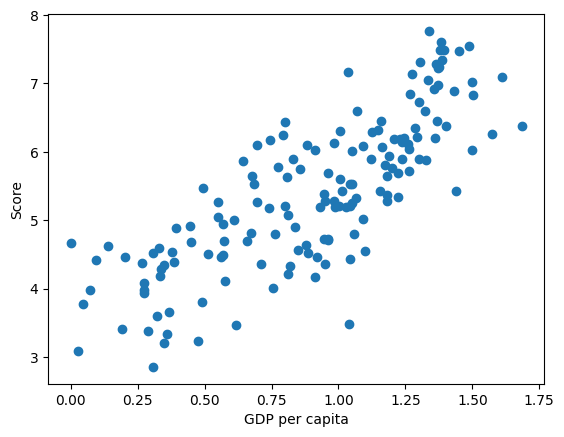

In [7]:
plt.scatter(df['GDP per capita'], df['Score'])
plt.xlabel('GDP per capita')
plt.ylabel('Score')

In [24]:
best_eps = None
best_min_samples = None
best_score = -1

eps_values = np.arange(0.1, 1.0, 0.1)
min_samples_values = range(2, 10)

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df[['GDP per capita', 'Score']])

        if len(np.unique(labels)) > 1:
            score = silhouette_score(df[['GDP per capita', 'Score']], labels)
            if score > best_score:
                best_eps = eps
                best_min_samples = min_samples
                best_score = score

print(f"Best eps: {best_eps}, Best min_samples: {best_min_samples}, Best Silhouette Score: {best_score}")

Best eps: 0.30000000000000004, Best min_samples: 9, Best Silhouette Score: 0.3896477705411785


In [31]:
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
y_predicted = dbscan.fit_predict(df[['GDP per capita', 'Score']])
y_predicted

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1, -1,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1])

In [32]:
df['cluster'] = y_predicted
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,cluster
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,0
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,0
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,0
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,0
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,0


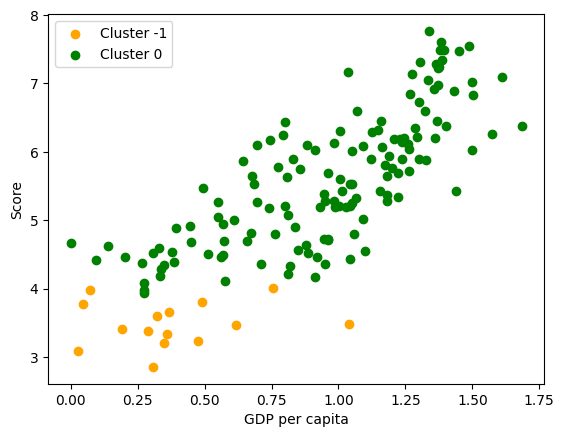

In [35]:
unique_clusters = np.unique(y_predicted)
colors = ['green', 'red', 'black', 'blue', 'purple', 'orange']

for cluster in unique_clusters:
    cluster_points = df[df.cluster == cluster]
    plt.scatter(cluster_points['GDP per capita'], cluster_points['Score'], color=colors[cluster % len(colors)], label=f'Cluster {cluster}')

plt.xlabel('GDP per capita')
plt.ylabel('Score')
plt.legend()
plt.show()

In [36]:
scaler = MinMaxScaler()

scaler.fit(df[['Score']])
df['Score'] = scaler.transform(df[['Score']])

scaler.fit(df[['GDP per capita']])
df['GDP per capita'] = scaler.transform(df[['GDP per capita']])

In [37]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,cluster
0,1,Finland,1.000000,0.795724,1.587,0.986,0.596,0.153,0.393,0
1,2,Denmark,0.965622,0.821259,1.573,0.996,0.592,0.252,0.410,0
2,3,Norway,0.956265,0.883610,1.582,1.028,0.603,0.271,0.341,0
3,4,Iceland,0.944060,0.819477,1.624,1.026,0.591,0.354,0.118,0
4,5,Netherlands,0.942840,0.828979,1.522,0.999,0.557,0.322,0.298,0


In [38]:
best_eps = None
best_min_samples = None
best_score = -1

eps_values = np.arange(0.1, 1.0, 0.1)
min_samples_values = range(2, 10)

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df[['GDP per capita', 'Score']])

        if len(np.unique(labels)) > 1:
            score = silhouette_score(df[['GDP per capita', 'Score']], labels)
            if score > best_score:
                best_eps = eps
                best_min_samples = min_samples
                best_score = score

print(f"Best eps: {best_eps}, Best min_samples: {best_min_samples}, Best Silhouette Score: {best_score}")

Best eps: 0.1, Best min_samples: 9, Best Silhouette Score: 0.30788011368248624


In [39]:
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
y_predicted = dbscan.fit_predict(df[['GDP per capita', 'Score']])
y_predicted

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0, -1, -1,  0,  0, -1, -1, -1, -1, -1, -1,
       -1, -1, -1])

In [40]:
df['cluster'] = y_predicted
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,cluster
0,1,Finland,1.000000,0.795724,1.587,0.986,0.596,0.153,0.393,0
1,2,Denmark,0.965622,0.821259,1.573,0.996,0.592,0.252,0.410,0
2,3,Norway,0.956265,0.883610,1.582,1.028,0.603,0.271,0.341,0
3,4,Iceland,0.944060,0.819477,1.624,1.026,0.591,0.354,0.118,0
4,5,Netherlands,0.942840,0.828979,1.522,0.999,0.557,0.322,0.298,0


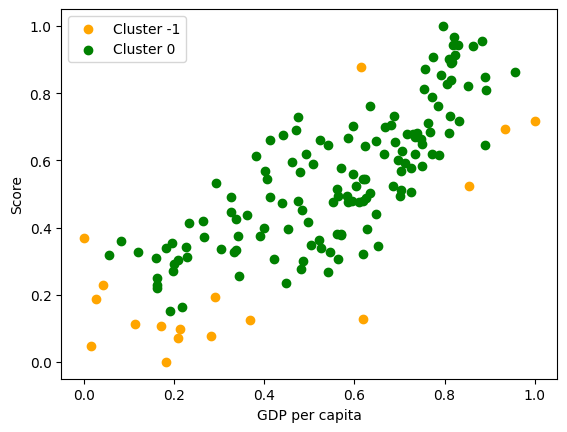

In [41]:
unique_clusters = np.unique(y_predicted)
colors = ['green', 'red', 'black', 'blue', 'purple', 'orange']

for cluster in unique_clusters:
    cluster_points = df[df.cluster == cluster]
    plt.scatter(cluster_points['GDP per capita'], cluster_points['Score'], color=colors[cluster % len(colors)], label=f'Cluster {cluster}')

plt.xlabel('GDP per capita')
plt.ylabel('Score')
plt.legend()
plt.show()